In [24]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ratings = pd.read_csv('data/ratings_new.csv')

In [11]:
with open('./pkl/movie_to_index.pkl', 'rb') as movie_mapping:
    movie_to_index = pickle.load(movie_mapping)
with open('./pkl/user_to_index.pkl', 'rb') as user_mapping:
    user_to_index = pickle.load(user_mapping)
    
ratings.movieId = ratings.movieId.apply(lambda x: movie_to_index[x])
ratings.userId = ratings.userId.apply(lambda x: user_to_index[x])
ratings.head()

,userId,movieId,rating,timestamp
0,0,0,2.0,1256677210
1,0,1,3.5,1256677486
2,1,2,3.5,1113766176
3,1,3,4.5,1113766820
4,1,4,3.5,1113766824


In [131]:
index_to_user = {v: k for k, v in user_to_index.items()}

In [65]:
ratings.shape

(9254716, 4)

In [110]:
n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())
min_rating, max_rating = ratings.rating.min(),ratings.rating.max()

In [111]:
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        n_users, n_movies, min_rating, max_rating
    )
)

Number of users: 181664, Number of Movies: 21639, Min rating: 0.5, Max rating: 5.0


In [21]:
movie_rating_count = ratings.groupby(['movieId']).size().values

In [31]:
np.mean(movie_rating_count)

427.68686168492076

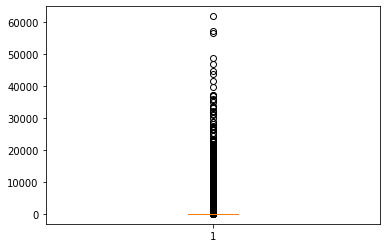

In [29]:
plt.boxplot(movie_rating_count)
plt.show()

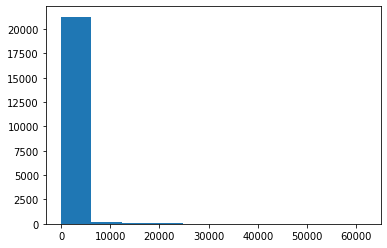

In [30]:
plt.hist(movie_rating_count)
plt.show()

In [139]:
cutoff = 200

In [140]:
gb = ratings.groupby(['movieId'])

In [66]:
# ratings_filtered = gb.sample(frac=0.1, random_state=1)

In [141]:
ratings_filtered = gb.apply(lambda x: x.sample(frac=0.1, random_state=1) if x.count()['movieId'] > cutoff else x.sample(frac=1, random_state=1))

In [142]:
ratings_filtered.reset_index(drop=True, inplace=True)

In [143]:
ratings_filtered.head()

,userId,movieId,rating,timestamp
0,61079,0,3.0,1434765430
1,158912,0,3.0,992301418
2,77076,0,3.0,1311479383
3,147837,0,3.0,1030230431
4,65974,0,2.0,1036195906


In [144]:
ratings_filtered.movieId.nunique()

21639

In [145]:
ratings_filtered.userId.nunique()

120951

In [44]:
# movie_0 = ratings[ratings['movieId'] == 0].sample(n=cutoff)
# movie_1 = ratings[ratings['movieId'] == 1].sample(n=cutoff)

In [146]:
# ratings[ratings['movieId'] == 0].sample(frac=0.1, random_state=1)

In [147]:
ratings[ratings['movieId'] == 21638]

,userId,movieId,rating,timestamp
9248725,181530,21638,3.5,1417317969


In [148]:
ratings_filtered[ratings_filtered['movieId'] == 21638]

,userId,movieId,rating,timestamp
1250781,181530,21638,3.5,1417317969


In [150]:
ratings_filtered.to_csv('data/ratings_filtered.csv', index=False)